In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [2]:
shapefile_path = "../../Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Read the shapefile
world = gpd.read_file(shapefile_path)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [3]:
list(world.columns)

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'TLC',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_ISO',
 'ADM0_DIFF',
 'ADM0_TLC',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT

In [4]:
df = pd.read_csv('../../Data/matrix_simetrized/SpectrumConUTRcompletas.csv')

d = {
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Czech Republic': 'Czechia',
    'Dominican Republic': 'Dominican Rep.',
    'USA': 'United States of America'
}

df['Country'] = df['Country'].replace(d)
df

,Country,assignments
0,Andorra,4
1,Argentina,1
2,Australia,1
3,Austria,1
4,Bahrain,4
...,...,...
104,United Kingdom,1
105,Uruguay,4
106,Uzbekistan,2
107,Venezuela,2


In [5]:
lst = []
for i in world['SOVEREIGNT']:
    if i not in list(df['Country']):
        lst.append(0)
    else:
        lst.append(list(df[df['Country'] == i]['assignments'])[0])
world['Cluster'] = lst
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Cluster
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",4


/tmp/ipykernel_7905/3107753628.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax)


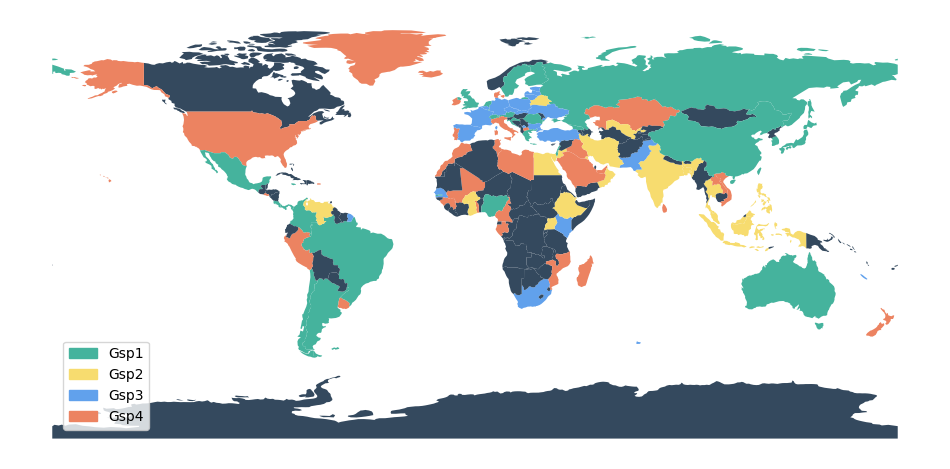

In [6]:
fig, ax = plt.subplots(1, 1)

# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'Gsp{i}') for i in range(1, 5)]
plt.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')

# Elimina marco de la gráfica principal
ax.set_axis_off()

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)

In [7]:
df = pd.DataFrame({'Country':['China', 'Denmark', 'United Kingdom', 'Switzerland', 'Australia', 'Germany', 'Hong Kong', 'Argentina', 'South Africa', 'Nigeria'],
                   'assignments': [1]* 8 + [2]*2})

df

,Country,assignments
0,China,1
1,Denmark,1
2,United Kingdom,1
3,Switzerland,1
4,Australia,1
5,Germany,1
6,Hong Kong,1
7,Argentina,1
8,South Africa,2
9,Nigeria,2


In [8]:
lst = []
for i in world['SOVEREIGNT']:
    if i not in list(df['Country']):
        lst.append(0)
    else:
        lst.append(list(df[df['Country'] == i]['assignments'])[0])
world['Cluster2'] = lst
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Cluster,Cluster2
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",0,0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",0,0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0,0
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",0,0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",4,0


/tmp/ipykernel_7905/3655457464.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax)


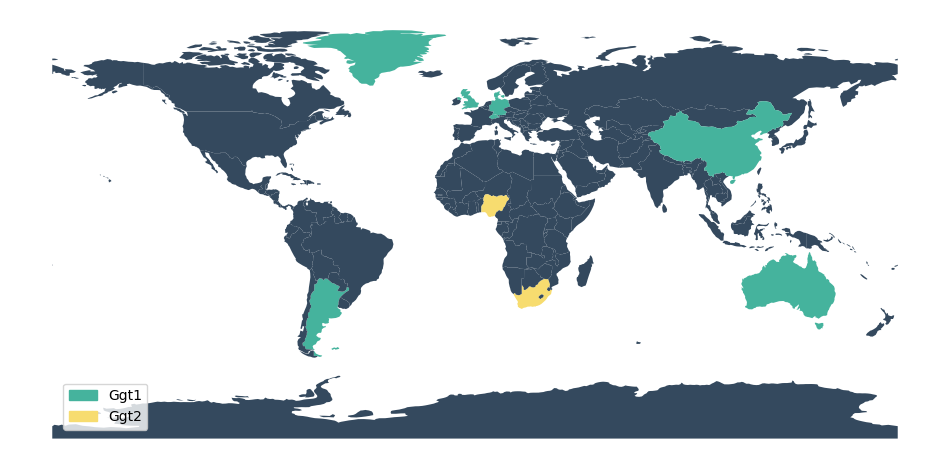

In [9]:
fig, ax = plt.subplots(1, 1)

# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster2']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'Ggt{i}') for i in range(1,3)]
plt.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')

# Elimina marco de la gráfica principal
ax.set_axis_off()

# Tamaño de la gráfica final
fig.set_size_inches(12, 8)

/tmp/ipykernel_7905/3164506307.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax1)
/tmp/ipykernel_7905/3164506307.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax2)


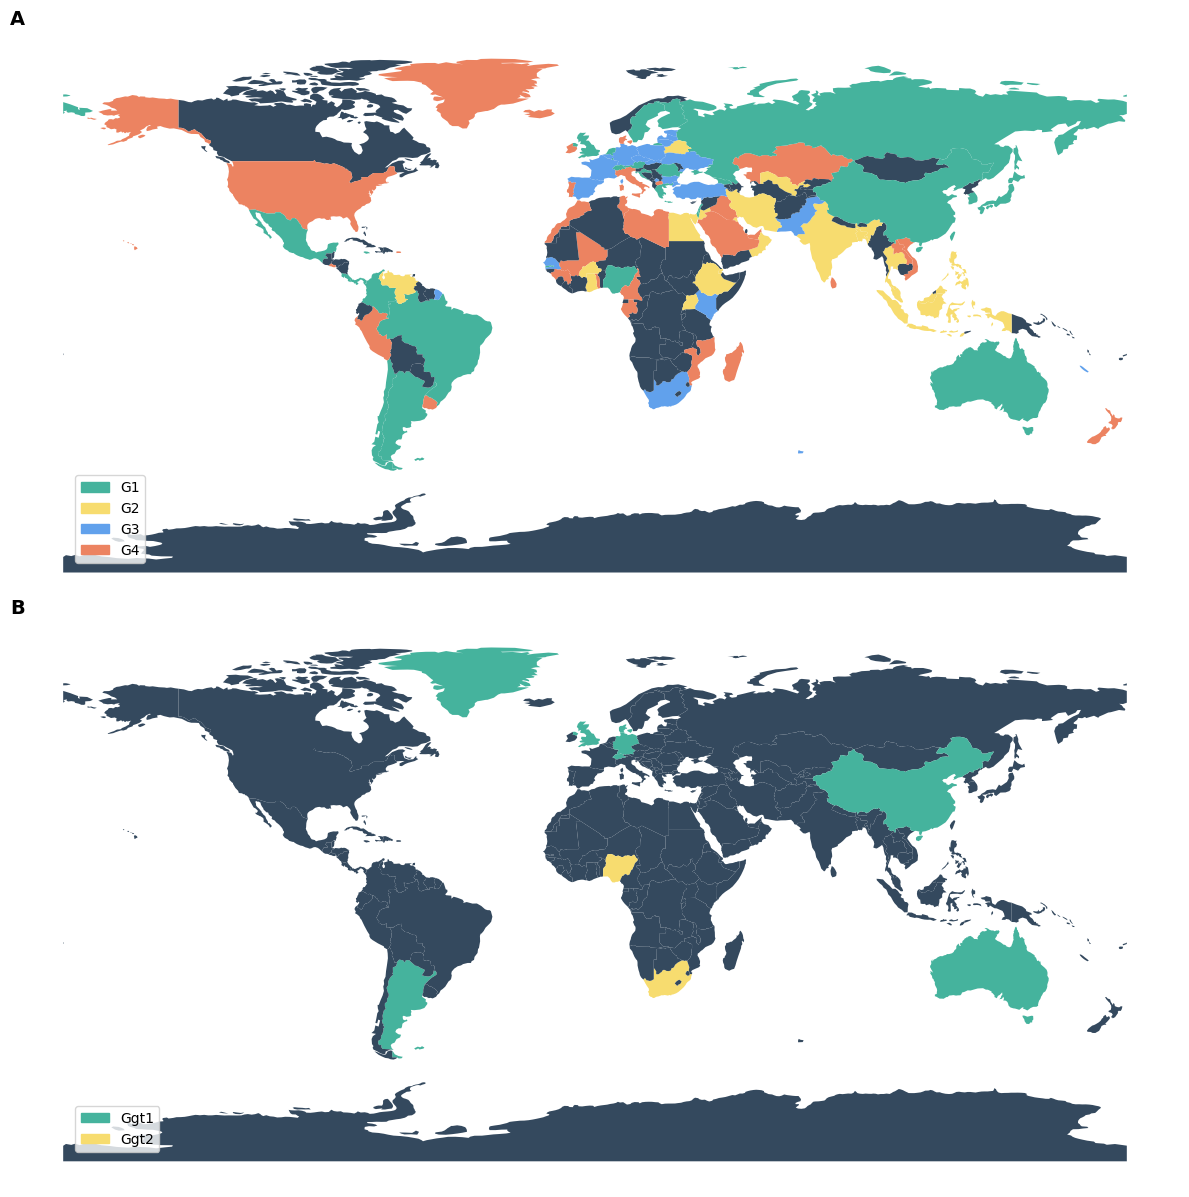

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax1)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'G{i}') for i in range(1, 5)]
ax1.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')

ax1.set_title('A', fontsize=14, fontweight='bold', loc = 'left')
# Elimina marco de la gráfica principal
ax1.set_axis_off()




# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster2']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax2)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'Ggt{i}') for i in range(1,3)]
plt.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')
ax2.set_title('B', fontsize=14, fontweight='bold', loc = 'left')
# Elimina marco de la gráfica principal
ax2.set_axis_off()




plt.subplots_adjust(hspace=-0.6)
plt.tight_layout()
plt.show()
fig.savefig('../../Plots/world_clusters.pdf', bbox_inches='tight')

/tmp/ipykernel_7905/406643065.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax1)
/tmp/ipykernel_7905/406643065.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(column='Cluster', color=colors, ax=ax2)


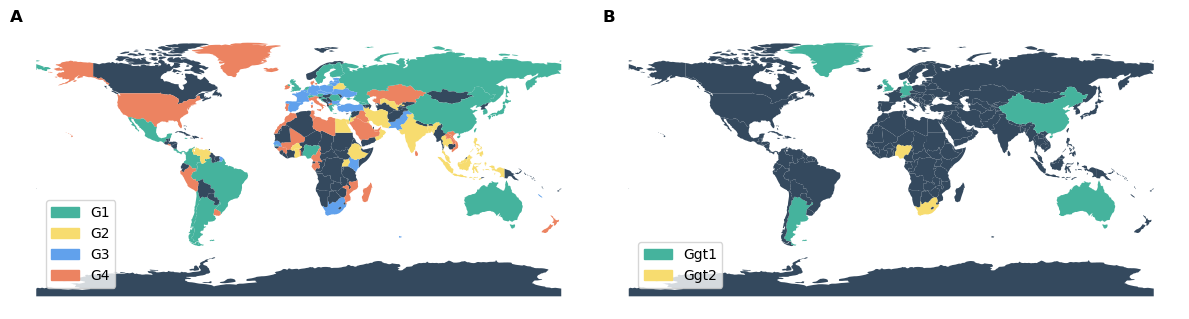

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 16))

# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax1)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'G{i}') for i in range(1, 5)]
ax1.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')

ax1.set_title('A', fontsize=12, fontweight='bold', loc = 'left')
# Elimina marco de la gráfica principal
ax1.set_axis_off()




# Crear un diccionario de colores
color_dict = {0: '#34495E', 1: '#45B39D', 2: '#F7DC6F', 3: '#61A1EC', 4: '#EC8361'}

# Crear una lista de colores para cada valor en 'Cluster'
colors = [color_dict[val] for val in world['Cluster2']]

# Dibujar el gráfico con los colores especificados
world.plot(column='Cluster', color=colors, ax=ax2)

# Crear una leyenda
patches = [mpatches.Patch(color=color_dict[i], label=f'Ggt{i}') for i in range(1,3)]
plt.legend(handles=patches, bbox_to_anchor=(0.05, 0.05), loc='lower left')
ax2.set_title('B', fontsize=12, fontweight='bold', loc = 'left')
# Elimina marco de la gráfica principal
ax2.set_axis_off()




plt.subplots_adjust(hspace=-0.6)
plt.tight_layout()
plt.show()
fig.savefig('../../Plots/world_clusters.pdf', bbox_inches='tight')